In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

In [125]:
df = pd.read_csv("hotel_bookings.csv")
data = pd.read_csv("hotel_bookings.csv")

#### Checking Rows and Columns in the data frame

In [126]:
df.shape

(119390, 32)

#### Describing The Data Frame

In [128]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#### Type of Data Frame

In [129]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

#### Name Of Coulmns

In [130]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

#### Finding Number of Null values in each column

In [131]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

#### Checking For Columns With Null values

In [132]:
df.isnull().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                           True
babies                            False
meal                              False
country                            True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                              True
company                            True


## Exploratory Data Analysis

#### Histogram
A histogram is basically used to represent data provided in a form of some groups.
It is accurate method for the graphical representation of numerical data distribution.
It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.

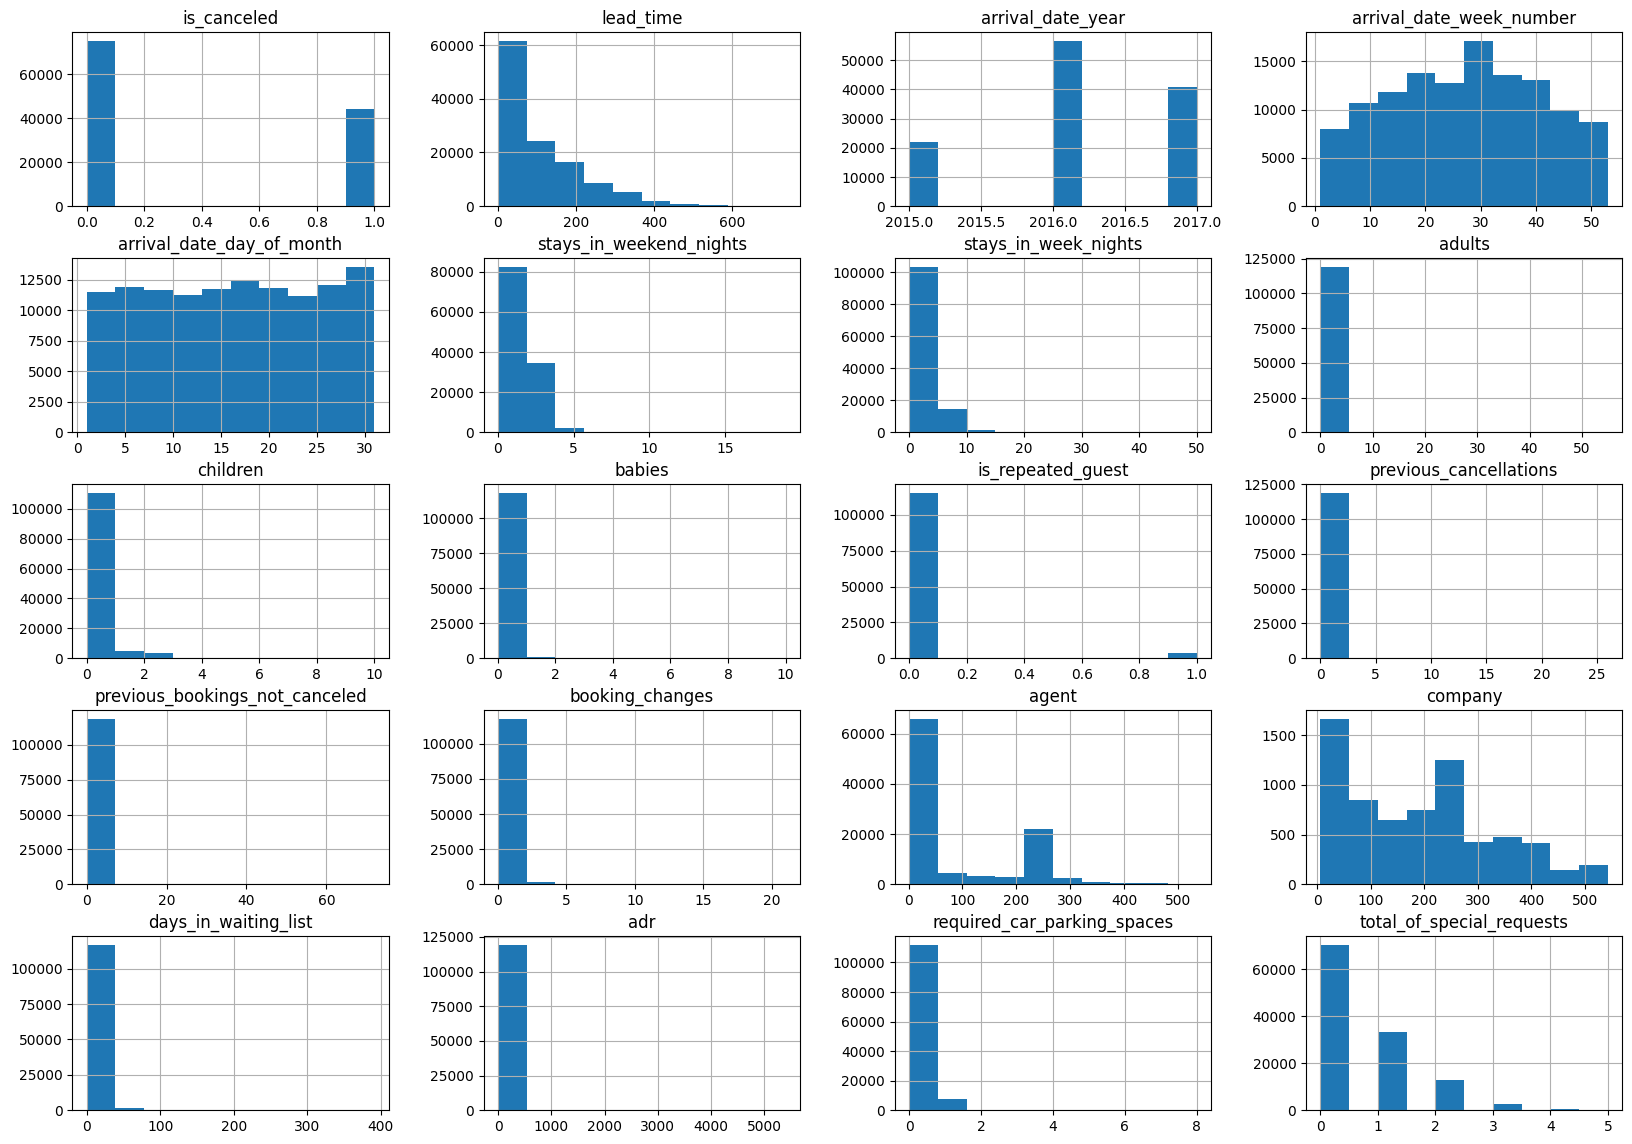

In [134]:
df.hist(figsize=(20,14))
plt.show()

<AxesSubplot:xlabel='children', ylabel='company'>

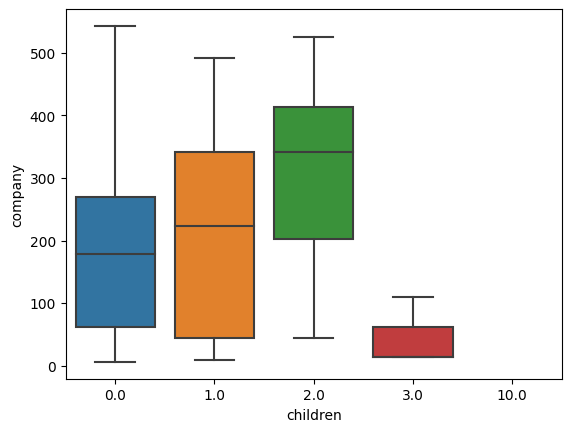

In [135]:
sns.boxplot(x='children',y='company',data=df)

<AxesSubplot:xlabel='company', ylabel='hotel'>

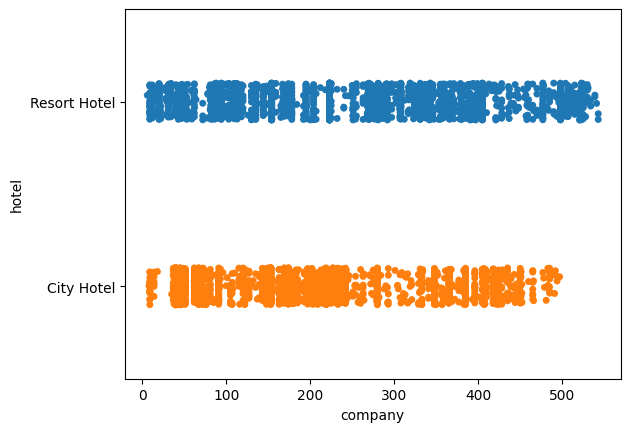

In [136]:
sns.stripplot(x='company',y='hotel',data=df)

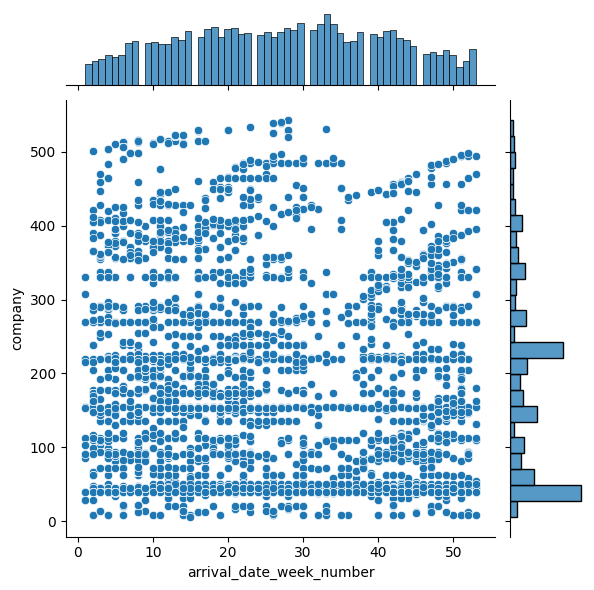

In [137]:
sns.jointplot(x='arrival_date_week_number', y= 'company', data=df)

<AxesSubplot:xlabel='company', ylabel='agent'>

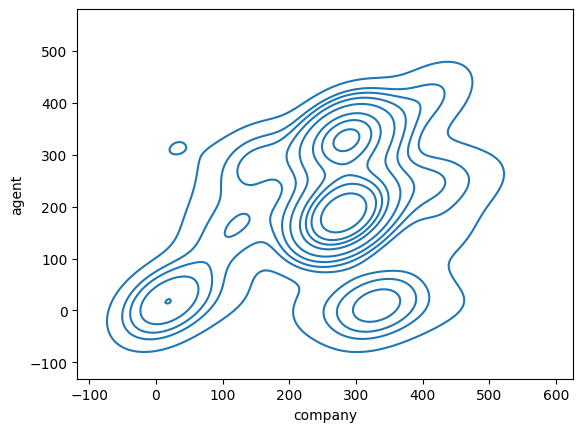

In [138]:
plt.style.use("default")
sns.kdeplot(x='company',y='agent',data=df)

<AxesSubplot:>

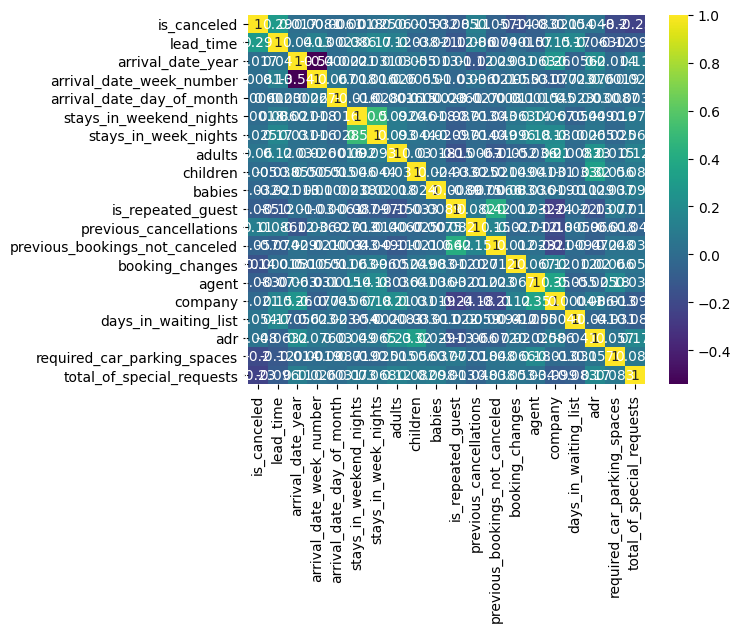

In [139]:
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

In [140]:
df = df.drop(['company', 'agent', 'country'], axis=1)

In [141]:
df = df.dropna()

In [142]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [143]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [144]:
df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [145]:
#lets find the categorialfeatures
list_1=list(df.columns)

In [146]:
list_cate=[]
for i in list_1:
    if df[i].dtype=='object':
        list_cate.append(i)

In [147]:
list_cate

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [148]:
le=LabelEncoder()

In [149]:
for i in list_cate:
    df[i]=le.fit_transform(df[i])

### Splitting Data Sets

In [151]:
y=df['hotel']
x=df.drop('hotel',axis=1)

In [207]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

### Logistic Regression

In [204]:
reg = LogisticRegression(solver='lbfgs', max_iter=10000)
reg.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [169]:
y_pred_reg=reg.predict(x_test)
acc_reg = accuracy_score(y_test, y_pred_reg)
print("Classification Report is:\n",classification_report(y_test,y_pred_reg))
print('\n')
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_reg))
print('\n')
print("Training Score:\n",round(reg.score(x_train,y_train)*100,2))
print('\n')
print(f"Accuracy Score of Logistic Regression is : {round(acc_reg,2)}")

Classification Report is:
               precision    recall  f1-score   support

           0       0.77      0.91      0.83     15891
           1       0.70      0.45      0.55      7987

    accuracy                           0.75     23878
   macro avg       0.73      0.68      0.69     23878
weighted avg       0.74      0.75      0.74     23878



Confusion Matrix:
 [[14387  1504]
 [ 4410  3577]]


Training Score:
 75.48


Accuracy Score of Logistic Regression is : 0.75


### K- Nearest Neighbor

In [168]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {round(acc_knn,2)}")
print('\n')
print(f"Confusion Matrix : \n{conf}")
print('\n')
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.88


Confusion Matrix : 
[[14897   994]
 [ 1826  6161]]


Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     15891
           1       0.86      0.77      0.81      7987

    accuracy                           0.88     23878
   macro avg       0.88      0.85      0.86     23878
weighted avg       0.88      0.88      0.88     23878



### Decision Tree Classifier

In [171]:
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [177]:
y_pred=dtree.predict(x_test)
print('\n')
conf =print(confusion_matrix(y_test, y_pred))
print('\n')
clf =print(classification_report(y_test, y_pred))
print('\n')
score=accuracy_score(y_test,y_pred)
print(f"Accuracy Of Decision Tree is : {round(score,2)}")



[[14919   972]
 [ 2448  5539]]


              precision    recall  f1-score   support

           0       0.86      0.94      0.90     15891
           1       0.85      0.69      0.76      7987

    accuracy                           0.86     23878
   macro avg       0.85      0.82      0.83     23878
weighted avg       0.86      0.86      0.85     23878



Accuracy Of Decision Tree is : 0.86


### Random Forest

In [176]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [182]:
y_pred=rfc.predict(x_test)
print("Confusion Matrix")
conf =print(confusion_matrix(y_test, y_pred))
print('\n')
print("Classification Report")
clf =print(classification_report(y_test, y_pred))
print('\n')
score=accuracy_score(y_test,y_pred)
print(f"Accuracy Of Random Forest is : {round(score,2)}")

Confusion Matrix
[[15565   326]
 [  485  7502]]


Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     15891
           1       0.96      0.94      0.95      7987

    accuracy                           0.97     23878
   macro avg       0.96      0.96      0.96     23878
weighted avg       0.97      0.97      0.97     23878



Accuracy Of Random Forest is : 0.97


### Ada Boost Classifier

In [184]:
adb = AdaBoostClassifier(base_estimator = None)
adb.fit(x_train,y_train)

AdaBoostClassifier()

In [187]:
y_pred=adb.predict(x_test)
print("Confusion Matrix")
conf =print(confusion_matrix(y_test, y_pred))
print('\n')
print("Classification Report")
clf =print(classification_report(y_test, y_pred))
print('\n')
score=accuracy_score(y_test,y_pred)
print(f"Accuracy Of ADA Boost Classifier is : {round(score,2)}")

Confusion Matrix
[[14867  1024]
 [ 2121  5866]]


Classification Report
              precision    recall  f1-score   support

           0       0.88      0.94      0.90     15891
           1       0.85      0.73      0.79      7987

    accuracy                           0.87     23878
   macro avg       0.86      0.84      0.85     23878
weighted avg       0.87      0.87      0.87     23878



Accuracy Of ADA Boost Classifier is : 0.87


### Gradient Boosting Classifier

In [192]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [194]:
y_pred=gbc.predict(x_test)
print("Confusion Matrix")
conf =print(confusion_matrix(y_test, y_pred))
print('\n')
print("Classification Report")
clf =print(classification_report(y_test, y_pred))
print('\n')
score=accuracy_score(y_test,y_pred)
print(f"Accuracy Of Gradient Boosting Classifier is : {round(score,3)}")

Confusion Matrix
[[15217   674]
 [ 1601  6386]]


Classification Report
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     15891
           1       0.90      0.80      0.85      7987

    accuracy                           0.90     23878
   macro avg       0.90      0.88      0.89     23878
weighted avg       0.90      0.90      0.90     23878



Accuracy Of Gradient Boosting Classifier is : 0.905


### XGB Classifier

In [195]:
xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xgb.fit(x_train, y_train)

[10:02:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[10:02:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1,
              objective='reg:linear', random_state=0, reg_alpha=10,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [196]:
y_pred=xgb.predict(x_test)
print("Confusion Matrix")
conf =print(confusion_matrix(y_test, y_pred))
print('\n')
print("Classification Report")
clf =print(classification_report(y_test, y_pred))
print('\n')
score=accuracy_score(y_test,y_pred)
print(f"Accuracy Of XGB Classifier is : {round(score,3)}")

Confusion Matrix
[[15403   488]
 [ 2976  5011]]


Classification Report
              precision    recall  f1-score   support

           0       0.84      0.97      0.90     15891
           1       0.91      0.63      0.74      7987

    accuracy                           0.85     23878
   macro avg       0.87      0.80      0.82     23878
weighted avg       0.86      0.85      0.85     23878



Accuracy Of XGB Classifier is : 0.855


### Extra Trees Classifier

In [197]:
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(x_train,y_train)

ExtraTreesClassifier(random_state=0)

In [198]:
y_pred=etc.predict(x_test)
print("Confusion Matrix")
conf =print(confusion_matrix(y_test, y_pred))
print('\n')
print("Classification Report")
clf =print(classification_report(y_test, y_pred))
print('\n')
score=accuracy_score(y_test,y_pred)
print(f"Accuracy Of Extra Trees Classifier is : {round(score,3)}")

Confusion Matrix
[[15526   365]
 [  542  7445]]


Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     15891
           1       0.95      0.93      0.94      7987

    accuracy                           0.96     23878
   macro avg       0.96      0.95      0.96     23878
weighted avg       0.96      0.96      0.96     23878



Accuracy Of Extra Trees Classifier is : 0.962


### Bagging Classifier

In [200]:
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(x_train, y_train)
score = model.score(x_test,y_test)
print(f"Accuracy Of Bagging Classifier is : {round(score,3)}")

Accuracy Of Bagging Classifier is : 0.96


In [201]:
df_new =  pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [203]:
df_new

,Actual,Predicted
117018,0,0
107541,0,0
56907,0,0
26114,1,1
42024,0,0
...,...,...
55160,0,0
78598,0,0
98604,0,0
64854,0,0


### We get the highest accuracy when we use random forest, we get an accuracy of 97%.